Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [3]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)
DATA_DIR = path

Path to dataset files: /Users/bodepacker/.cache/kagglehub/datasets/weinanwangrutgers/pulsedb-balanced-training-and-testing/versions/4


In [4]:
# # run this block to move the data to a permanent directory in your drive

# import os, glob
# from google.colab import drive
# drive.mount('/content/drive')
# DATA_DIR = "/content/drive/MyDrive/pulsedb/"
# !mkdir -p $DATA_DIR
# !cp -r $path/* $DATA_DIR

In [5]:
# # run this block after data is saved to your drive

# import os, glob
# from google.colab import drive
# drive.mount('/content/drive')
# DATA_DIR = "/content/drive/MyDrive/pulsedb/"

# mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
# print(f"Found {len(mat_files)} .mat files")
# for f in mat_files:
#     print(" -", f)

Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [6]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'/VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'/VitalDB_Train_Subset.mat')

finished loading/Users/bodepacker/.cache/kagglehub/datasets/weinanwangrutgers/pulsedb-balanced-training-and-testing/versions/4/VitalDB_CalBased_Test_Subset.mat
constructed df
finished loading/Users/bodepacker/.cache/kagglehub/datasets/weinanwangrutgers/pulsedb-balanced-training-and-testing/versions/4/VitalDB_Train_Subset.mat
constructed df


In [7]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [8]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

Subject
p000001_1    40
p004253_1    40
p004118_1    40
p004115_1    40
p004111_1    40
             ..
p002038_1    40
p002034_1    40
p002033_1    40
p002025_1    40
p006090_1    40
Name: count, Length: 1293, dtype: int64

DATASET OVERVIEW

--- CalBased Test Set ---
Number of samples: 51720
Number of unique subjects: 1293
Samples per subject: 40
ECG signal shape: (51720, 1250)
PPG signal shape: (51720, 1250)
ABP signal shape: (51720, 1250)

--- Training Set ---
Number of samples: 465480
Number of unique subjects: 1293
Samples per subject: 360
ECG signal shape: (465480, 1250)
PPG signal shape: (465480, 1250)
ABP signal shape: (465480, 1250)

SUMMARY STATISTICS - Training Set
             Age        BMI        DBP     Gender     Height        SBP  \
count  465480.00  465480.00  465480.00  465480.00  465480.00  465480.00   
mean       58.98      22.92      62.92       0.58     162.50     115.48   
std        15.03       3.44      12.08       0.49       9.64      18.93   
min         0.40      12.40      16.23       0.00      54.00      38.51   
25%        51.00      20.70      54.45       0.00     156.60     102.08   
50%        61.00      22.80      62.17       1.00     162.90     113.99   
75%        70.0

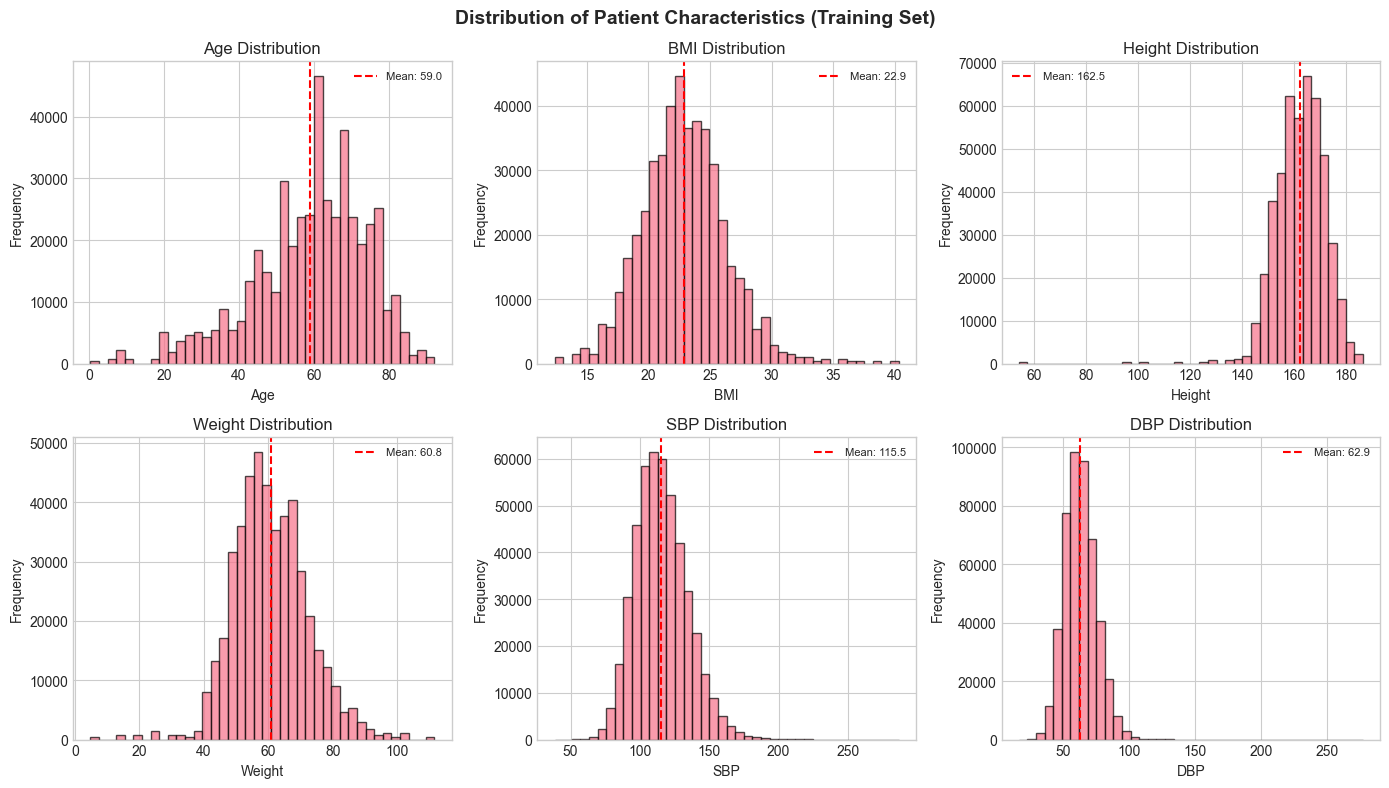

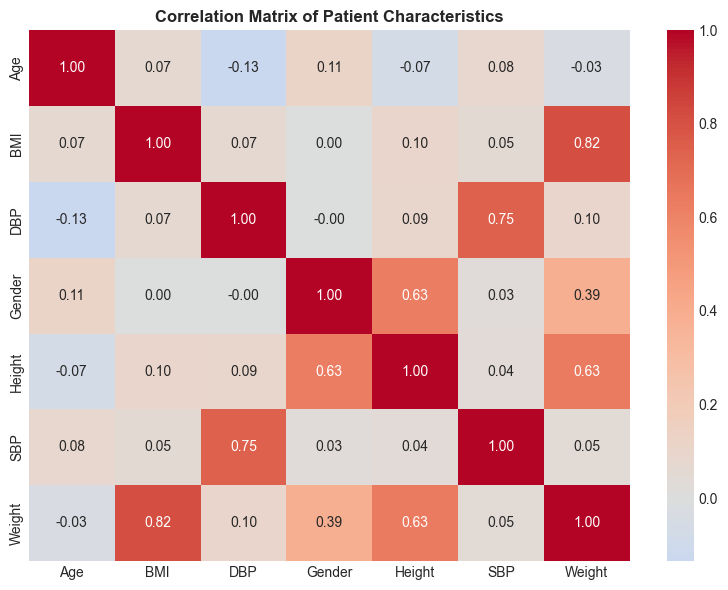

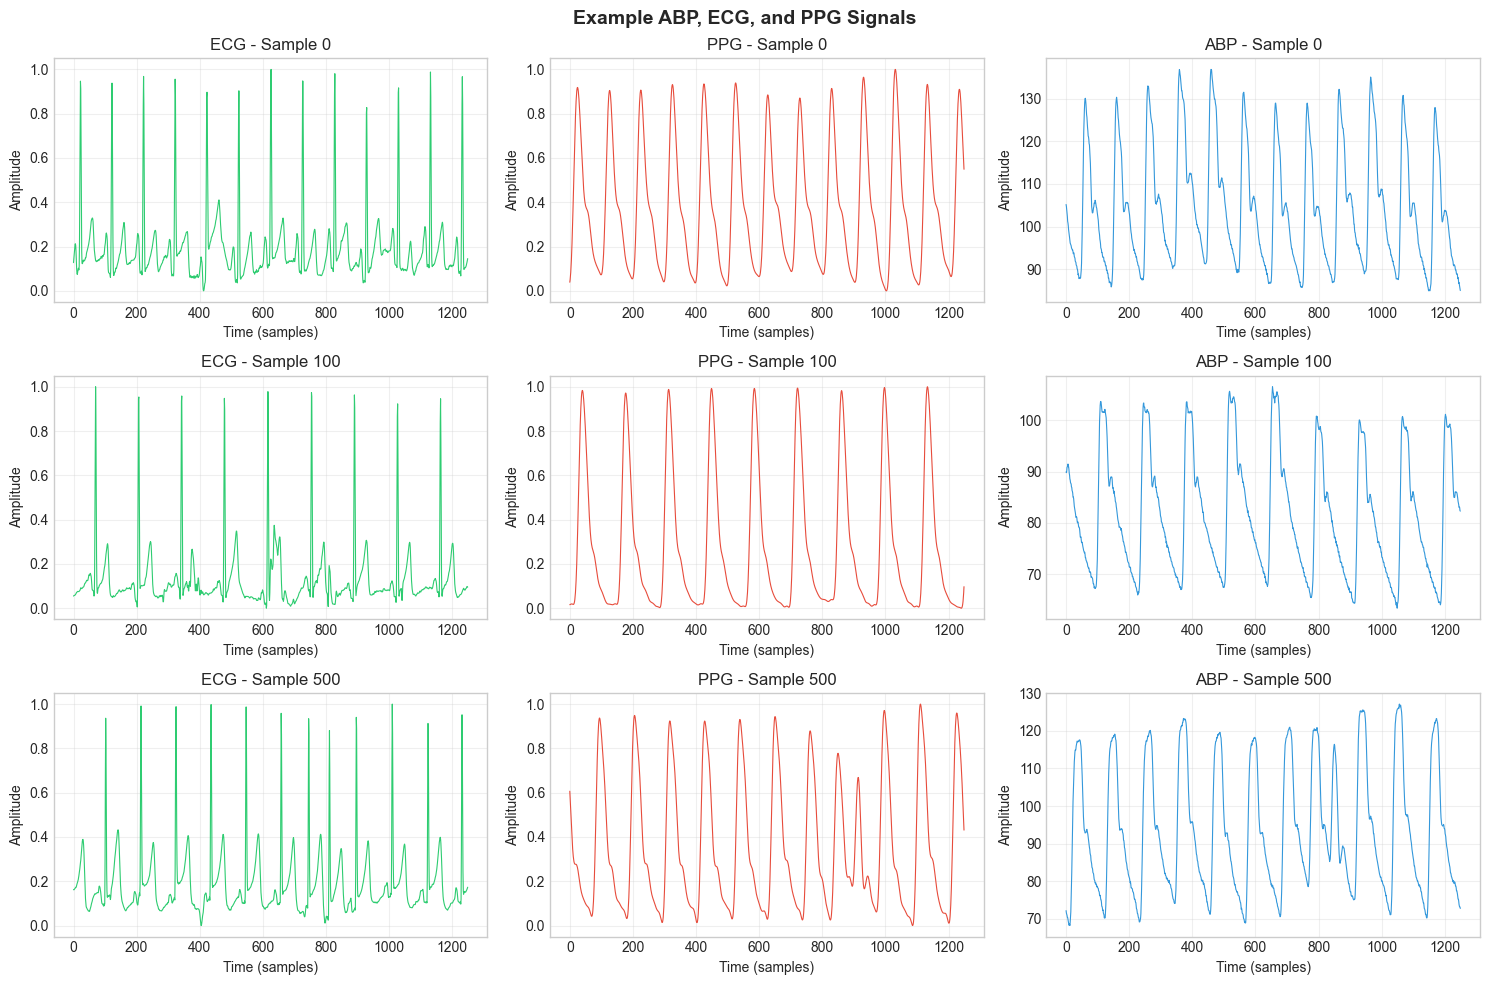

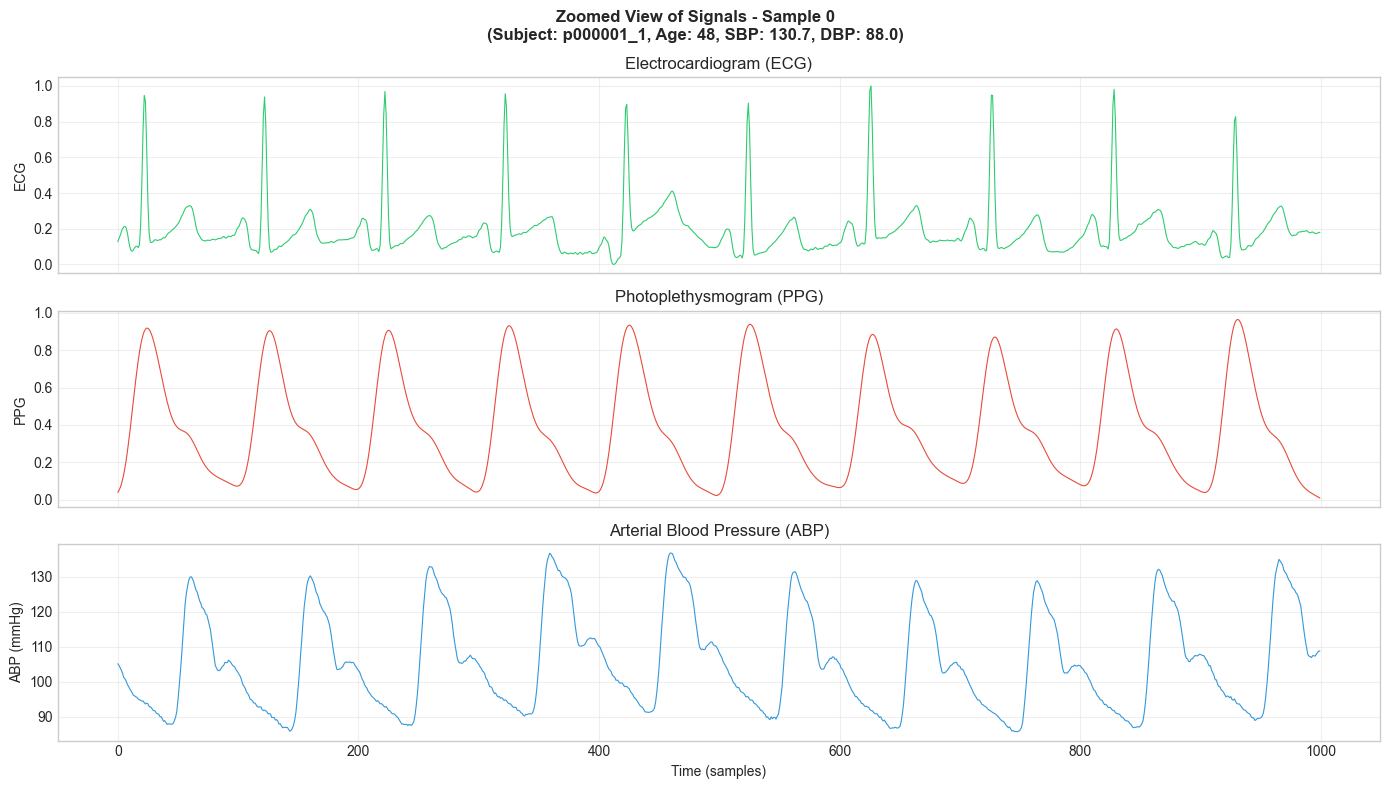


KEY FINDINGS SUMMARY

1. Dataset Size: 
   - Training: 465,480 samples from 1293 subjects
   - Test: 51,720 samples from 1293 subjects

2. Signal Length: 1,250 samples per recording

3. Age Range: 0.4 - 92.0 years (mean: 59.0)

4. Blood Pressure (Training Set):
   - SBP: 38.5 - 286.6 mmHg (mean: 115.5)
   - DBP: 16.2 - 276.9 mmHg (mean: 62.9)

5. Gender Distribution: 57.7% Male, 42.3% Female

6. BMI Range: 12.4 - 40.3 (mean: 22.9)



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================
# 1. DATASET OVERVIEW
# ============================================
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\n--- CalBased Test Set ---")
print(f"Number of samples: {len(df_CalBased_Test)}")
print(f"Number of unique subjects: {df_CalBased_Test['Subject'].nunique()}")
print(f"Samples per subject: {len(df_CalBased_Test) // df_CalBased_Test['Subject'].nunique()}")
print(f"ECG signal shape: {ECG_CalBased_Test.shape}")
print(f"PPG signal shape: {PPG_CalBased_Test.shape}")
print(f"ABP signal shape: {ABP_CalBased_Test.shape}")

print(f"\n--- Training Set ---")
print(f"Number of samples: {len(df_Train)}")
print(f"Number of unique subjects: {df_Train['Subject'].nunique()}")
print(f"Samples per subject: {len(df_Train) // df_Train['Subject'].nunique()}")
print(f"ECG signal shape: {ECG_Train.shape}")
print(f"PPG signal shape: {PPG_Train.shape}")
print(f"ABP signal shape: {ABP_Train.shape}")

# ============================================
# 2. SUMMARY STATISTICS
# ============================================
print("\n" + "=" * 60)
print("SUMMARY STATISTICS - Training Set")
print("=" * 60)
print(df_Train.describe().round(2))

print("\n" + "=" * 60)
print("SUMMARY STATISTICS - CalBased Test Set")
print("=" * 60)
print(df_CalBased_Test.describe().round(2))

# Gender distribution
print("\n--- Gender Distribution (0=Female, 1=Male) ---")
print("Training Set:")
print(df_Train['Gender'].value_counts(normalize=True).round(3))
print("\nCalBased Test Set:")
print(df_CalBased_Test['Gender'].value_counts(normalize=True).round(3))

# ============================================
# 3. DISTRIBUTION PLOTS
# ============================================
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Distribution of Patient Characteristics (Training Set)', fontsize=14, fontweight='bold')

features = ['Age', 'BMI', 'Height', 'Weight', 'SBP', 'DBP']
for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df_Train[feature], bins=40, edgecolor='black', alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{feature} Distribution')
    ax.axvline(df_Train[feature].mean(), color='red', linestyle='--', label=f'Mean: {df_Train[feature].mean():.1f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# ============================================
# 4. CORRELATION HEATMAP
# ============================================
fig, ax = plt.subplots(figsize=(8, 6))
numeric_cols = ['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Weight']
corr_matrix = df_Train[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=ax)
ax.set_title('Correlation Matrix of Patient Characteristics', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================
# 5. EXAMPLE SIGNAL PLOTS (ABP, ECG, PPG)
# ============================================
# Plot 3 example samples showing all three signals
sample_indices = [0, 100, 500]  # Different samples to show variety
signal_length = ECG_Train.shape[1]
time_axis = np.arange(signal_length)  # Time in samples (125 Hz sampling rate typical for these signals)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Example ABP, ECG, and PPG Signals', fontsize=14, fontweight='bold')

signal_names = ['ECG', 'PPG', 'ABP']
signal_data = [ECG_Train, PPG_Train, ABP_Train]
colors = ['#2ecc71', '#e74c3c', '#3498db']

for row, sample_idx in enumerate(sample_indices):
    for col, (name, data, color) in enumerate(zip(signal_names, signal_data, colors)):
        ax = axes[row, col]
        ax.plot(time_axis, data[sample_idx], color=color, linewidth=0.8)
        ax.set_title(f'{name} - Sample {sample_idx}')
        ax.set_xlabel('Time (samples)')
        ax.set_ylabel('Amplitude')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 6. ZOOMED SIGNAL PLOT (Single Sample)
# ============================================
# Show a zoomed view of all three signals for one sample
sample_idx = 0
zoom_range = slice(0, 1000)  # First 1000 samples (~8 seconds at 125 Hz)

fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
fig.suptitle(f'Zoomed View of Signals - Sample {sample_idx}\n(Subject: {df_Train.iloc[sample_idx]["Subject"]}, Age: {df_Train.iloc[sample_idx]["Age"]:.0f}, SBP: {df_Train.iloc[sample_idx]["SBP"]:.1f}, DBP: {df_Train.iloc[sample_idx]["DBP"]:.1f})', 
             fontsize=12, fontweight='bold')

axes[0].plot(time_axis[zoom_range], ECG_Train[sample_idx][zoom_range], color='#2ecc71', linewidth=0.8)
axes[0].set_ylabel('ECG')
axes[0].set_title('Electrocardiogram (ECG)')

axes[1].plot(time_axis[zoom_range], PPG_Train[sample_idx][zoom_range], color='#e74c3c', linewidth=0.8)
axes[1].set_ylabel('PPG')
axes[1].set_title('Photoplethysmogram (PPG)')

axes[2].plot(time_axis[zoom_range], ABP_Train[sample_idx][zoom_range], color='#3498db', linewidth=0.8)
axes[2].set_ylabel('ABP (mmHg)')
axes[2].set_xlabel('Time (samples)')
axes[2].set_title('Arterial Blood Pressure (ABP)')

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("KEY FINDINGS SUMMARY")
print("=" * 60)
print(f"""
1. Dataset Size: 
   - Training: {len(df_Train):,} samples from {df_Train['Subject'].nunique()} subjects
   - Test: {len(df_CalBased_Test):,} samples from {df_CalBased_Test['Subject'].nunique()} subjects

2. Signal Length: {signal_length:,} samples per recording

3. Age Range: {df_Train['Age'].min():.1f} - {df_Train['Age'].max():.1f} years (mean: {df_Train['Age'].mean():.1f})

4. Blood Pressure (Training Set):
   - SBP: {df_Train['SBP'].min():.1f} - {df_Train['SBP'].max():.1f} mmHg (mean: {df_Train['SBP'].mean():.1f})
   - DBP: {df_Train['DBP'].min():.1f} - {df_Train['DBP'].max():.1f} mmHg (mean: {df_Train['DBP'].mean():.1f})

5. Gender Distribution: {df_Train['Gender'].mean()*100:.1f}% Male, {(1-df_Train['Gender'].mean())*100:.1f}% Female

6. BMI Range: {df_Train['BMI'].min():.1f} - {df_Train['BMI'].max():.1f} (mean: {df_Train['BMI'].mean():.1f})
""")

#2. Blood Pressure Prediction


Extracting features from signals...
Training features shape: (465480, 16)
Test features shape: (51720, 16)

MODEL 1: RIDGE REGRESSION
Ridge - SBP:
  ME:  -0.03 mmHg
  SDE: 17.87 mmHg
  MAE: 14.14 mmHg
  R²:  0.1005
Ridge - DBP:
  ME:  -0.03 mmHg
  SDE: 11.38 mmHg
  MAE: 8.97 mmHg
  R²:  0.1117

MODEL 2: FULLY CONNECTED NEURAL NETWORK
Using device: mps
Epoch 5/40, Loss: 244.9302
Epoch 10/40, Loss: 216.5675
Epoch 15/40, Loss: 211.2153
Epoch 20/40, Loss: 208.0803
Epoch 25/40, Loss: 205.7070
Epoch 30/40, Loss: 203.9554
Epoch 35/40, Loss: 202.5347
Epoch 40/40, Loss: 201.7330
MLP - SBP:
  ME:  -0.67 mmHg
  SDE: 16.38 mmHg
  MAE: 12.76 mmHg
  R²:  0.2434
MLP - DBP:
  ME:  -0.46 mmHg
  SDE: 10.63 mmHg
  MAE: 8.30 mmHg
  R²:  0.2233

MODEL COMPARISON SUMMARY
      Model        ME       SDE       MAE       R²
Ridge (SBP) -0.032226 17.874497 14.138161 0.100491
Ridge (DBP) -0.026198 11.376436  8.968893 0.111652
  MLP (SBP) -0.670184 16.379142 12.755566 0.243437
  MLP (DBP) -0.462062 10.627199  8.2

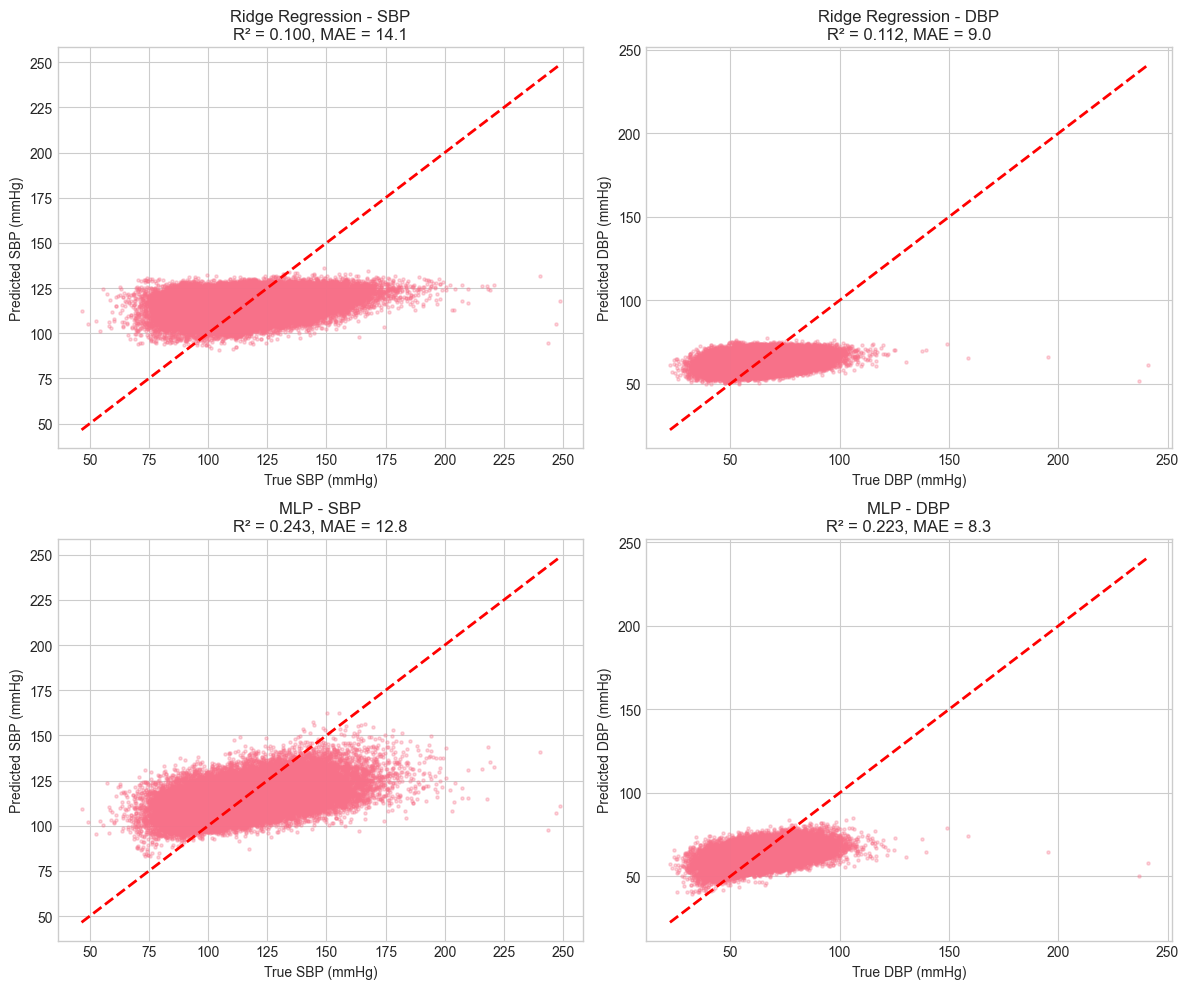

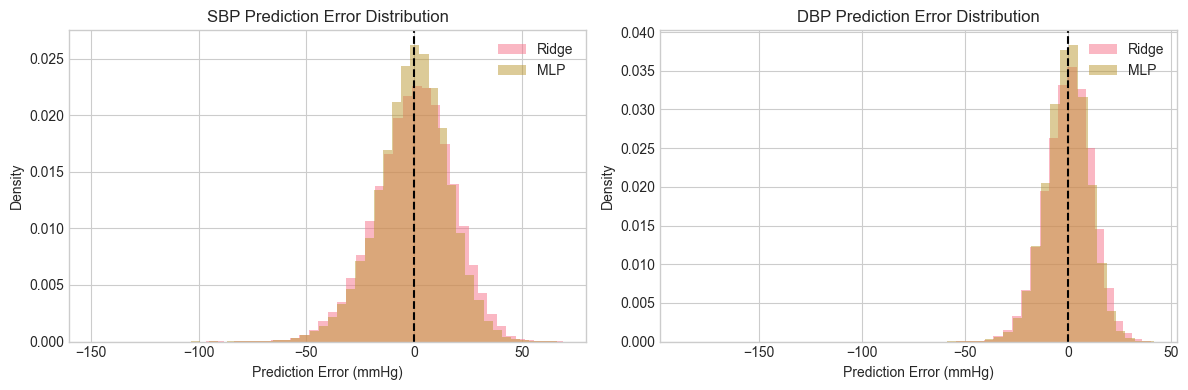


ANALYSIS COMPLETE


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


# HELPER FUNCTIONS
def compute_metrics(y_true, y_pred):
    """Compute ME, SDE, MAE, R² as defined in the paper"""
    errors = y_pred - y_true
    ME = np.mean(errors)  # Mean Error (bias)
    SDE = np.std(errors)  # Standard Deviation of Error
    MAE = mean_absolute_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    return {'ME': ME, 'SDE': SDE, 'MAE': MAE, 'R2': R2}

def print_metrics(metrics, model_name, target):
    """Print metrics in a nice format"""
    print(f"{model_name} - {target}:")
    print(f"  ME:  {metrics['ME']:.2f} mmHg")
    print(f"  SDE: {metrics['SDE']:.2f} mmHg")
    print(f"  MAE: {metrics['MAE']:.2f} mmHg")
    print(f"  R²:  {metrics['R2']:.4f}")

def extract_features(ecg, ppg):
    """Extract simple statistical features from ECG and PPG signals"""
    features = []
    for signal in [ecg, ppg]:
        features.append(np.mean(signal, axis=1))
        features.append(np.std(signal, axis=1))
        features.append(np.max(signal, axis=1))
        features.append(np.min(signal, axis=1))
        features.append(np.max(signal, axis=1) - np.min(signal, axis=1))
        features.append(np.median(signal, axis=1))
        # Simple peak-based features
        features.append(np.percentile(signal, 25, axis=1))
        features.append(np.percentile(signal, 75, axis=1))
    return np.column_stack(features)

# Prepare data
print("Extracting features from signals...")

# Extract features for training
X_train_features = extract_features(ECG_Train, PPG_Train)
y_train_sbp = df_Train['SBP'].values
y_train_dbp = df_Train['DBP'].values

# Extract features for testing
X_test_features = extract_features(ECG_CalBased_Test, PPG_CalBased_Test)
y_test_sbp = df_CalBased_Test['SBP'].values
y_test_dbp = df_CalBased_Test['DBP'].values

print(f"Training features shape: {X_train_features.shape}")
print(f"Test features shape: {X_test_features.shape}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)


# Basic Linear Model (Ridge Regression)
print("\n" + "=" * 60)
print("MODEL 1: RIDGE REGRESSION")
print("=" * 60)

# Train Ridge models for SBP and DBP
ridge_sbp = Ridge(alpha=1.0)
ridge_dbp = Ridge(alpha=1.0)

ridge_sbp.fit(X_train_scaled, y_train_sbp)
ridge_dbp.fit(X_train_scaled, y_train_dbp)

# Predictions
pred_sbp_ridge = ridge_sbp.predict(X_test_scaled)
pred_dbp_ridge = ridge_dbp.predict(X_test_scaled)

# Evaluate
metrics_ridge_sbp = compute_metrics(y_test_sbp, pred_sbp_ridge)
metrics_ridge_dbp = compute_metrics(y_test_dbp, pred_dbp_ridge)

print_metrics(metrics_ridge_sbp, "Ridge", "SBP")
print_metrics(metrics_ridge_dbp, "Ridge", "DBP")

# 3. SIMPLE NEURAL NETWORK
print("\n" + "=" * 60)
print("MODEL 2: FULLY CONNECTED NEURAL NETWORK")
print("=" * 60)

if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using device: {device}")

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(np.column_stack([y_train_sbp, y_train_dbp]))
X_test_tensor = torch.FloatTensor(X_test_scaled)

# DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

# Simple MLP
class DeepNN(nn.Module):
    def __init__(self, input_dim):
        super(DeepNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )
    
    def forward(self, x):
        return self.net(x)

# Train model
model = DeepNN(X_train_scaled.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 40
for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

# Evaluate
model.eval()
with torch.no_grad():
    predictions_nn = model(X_test_tensor.to(device)).cpu().numpy()
pred_sbp_nn = predictions_nn[:, 0]
pred_dbp_nn = predictions_nn[:, 1]

metrics_nn_sbp = compute_metrics(y_test_sbp, pred_sbp_nn)
metrics_nn_dbp = compute_metrics(y_test_dbp, pred_dbp_nn)

print_metrics(metrics_nn_sbp, "MLP", "SBP")
print_metrics(metrics_nn_dbp, "MLP", "DBP")


# 4. COMPARISON TABLE
print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)

results = {
    'Model': ['Ridge (SBP)', 'Ridge (DBP)', 'MLP (SBP)', 'MLP (DBP)'],
    'ME': [metrics_ridge_sbp['ME'], metrics_ridge_dbp['ME'], 
           metrics_nn_sbp['ME'], metrics_nn_dbp['ME']],
    'SDE': [metrics_ridge_sbp['SDE'], metrics_ridge_dbp['SDE'],
            metrics_nn_sbp['SDE'], metrics_nn_dbp['SDE']],
    'MAE': [metrics_ridge_sbp['MAE'], metrics_ridge_dbp['MAE'],
            metrics_nn_sbp['MAE'], metrics_nn_dbp['MAE']],
    'R²': [metrics_ridge_sbp['R2'], metrics_ridge_dbp['R2'],
           metrics_nn_sbp['R2'], metrics_nn_dbp['R2']]
}
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# ============================================
# 5. TRUE VS PREDICTED PLOTS
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Ridge SBP
ax = axes[0, 0]
ax.scatter(y_test_sbp, pred_sbp_ridge, alpha=0.3, s=5)
ax.plot([y_test_sbp.min(), y_test_sbp.max()], [y_test_sbp.min(), y_test_sbp.max()], 'r--', lw=2)
ax.set_xlabel('True SBP (mmHg)')
ax.set_ylabel('Predicted SBP (mmHg)')
ax.set_title(f'Ridge Regression - SBP\nR² = {metrics_ridge_sbp["R2"]:.3f}, MAE = {metrics_ridge_sbp["MAE"]:.1f}')

# Ridge DBP
ax = axes[0, 1]
ax.scatter(y_test_dbp, pred_dbp_ridge, alpha=0.3, s=5)
ax.plot([y_test_dbp.min(), y_test_dbp.max()], [y_test_dbp.min(), y_test_dbp.max()], 'r--', lw=2)
ax.set_xlabel('True DBP (mmHg)')
ax.set_ylabel('Predicted DBP (mmHg)')
ax.set_title(f'Ridge Regression - DBP\nR² = {metrics_ridge_dbp["R2"]:.3f}, MAE = {metrics_ridge_dbp["MAE"]:.1f}')

# MLP SBP
ax = axes[1, 0]
ax.scatter(y_test_sbp, pred_sbp_nn, alpha=0.3, s=5)
ax.plot([y_test_sbp.min(), y_test_sbp.max()], [y_test_sbp.min(), y_test_sbp.max()], 'r--', lw=2)
ax.set_xlabel('True SBP (mmHg)')
ax.set_ylabel('Predicted SBP (mmHg)')
ax.set_title(f'MLP - SBP\nR² = {metrics_nn_sbp["R2"]:.3f}, MAE = {metrics_nn_sbp["MAE"]:.1f}')

# MLP DBP
ax = axes[1, 1]
ax.scatter(y_test_dbp, pred_dbp_nn, alpha=0.3, s=5)
ax.plot([y_test_dbp.min(), y_test_dbp.max()], [y_test_dbp.min(), y_test_dbp.max()], 'r--', lw=2)
ax.set_xlabel('True DBP (mmHg)')
ax.set_ylabel('Predicted DBP (mmHg)')
ax.set_title(f'MLP - DBP\nR² = {metrics_nn_dbp["R2"]:.3f}, MAE = {metrics_nn_dbp["MAE"]:.1f}')

plt.tight_layout()
plt.savefig('bp_prediction_results.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================
# 6. ERROR DISTRIBUTION PLOTS
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# SBP errors
ax = axes[0]
ax.hist(pred_sbp_ridge - y_test_sbp, bins=50, alpha=0.5, label='Ridge', density=True)
ax.hist(pred_sbp_nn - y_test_sbp, bins=50, alpha=0.5, label='MLP', density=True)
ax.axvline(0, color='k', linestyle='--')
ax.set_xlabel('Prediction Error (mmHg)')
ax.set_ylabel('Density')
ax.set_title('SBP Prediction Error Distribution')
ax.legend()

# DBP errors
ax = axes[1]
ax.hist(pred_dbp_ridge - y_test_dbp, bins=50, alpha=0.5, label='Ridge', density=True)
ax.hist(pred_dbp_nn - y_test_dbp, bins=50, alpha=0.5, label='MLP', density=True)
ax.axvline(0, color='k', linestyle='--')
ax.set_xlabel('Prediction Error (mmHg)')
ax.set_ylabel('Density')
ax.set_title('DBP Prediction Error Distribution')
ax.legend()

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)

Using device: mps
Preparing sequence data...
Sequence data shape: (465480, 2, 1250)
Subsampled training size: 46548

MODEL 3: DEEP NEURAL NETWORK
Epoch 10/30, Loss: 284.1551
Epoch 20/30, Loss: 274.4448
Epoch 30/30, Loss: 267.9893
Deep MLP - SBP:
  ME:  -1.27 mmHg
  SDE: 17.65 mmHg
  MAE: 13.93 mmHg
  R²:  0.1180
Deep MLP - DBP:
  ME:  -0.84 mmHg
  SDE: 11.39 mmHg
  MAE: 8.99 mmHg
  R²:  0.1049

MODEL 4: LSTM
Epoch 5/20, Loss: 253.5569
Epoch 10/20, Loss: 253.6027
Epoch 15/20, Loss: 254.0447
Epoch 20/20, Loss: 253.9059
LSTM - SBP:
  ME:  -0.55 mmHg
  SDE: 18.85 mmHg
  MAE: 14.93 mmHg
  R²:  -0.0008
LSTM - DBP:
  ME:  -0.19 mmHg
  SDE: 12.07 mmHg
  MAE: 9.53 mmHg
  R²:  -0.0002

MODEL 5: TRANSFORMER
Epoch 5/20, Loss: 227.9897
Epoch 10/20, Loss: 201.2549
Epoch 15/20, Loss: 181.8497
Epoch 20/20, Loss: 172.5581
Transformer - SBP:
  ME:  0.09 mmHg
  SDE: 15.65 mmHg
  MAE: 12.21 mmHg
  R²:  0.3104
Transformer - DBP:
  ME:  0.04 mmHg
  SDE: 10.46 mmHg
  MAE: 8.18 mmHg
  R²:  0.2490

ALL MODELS 

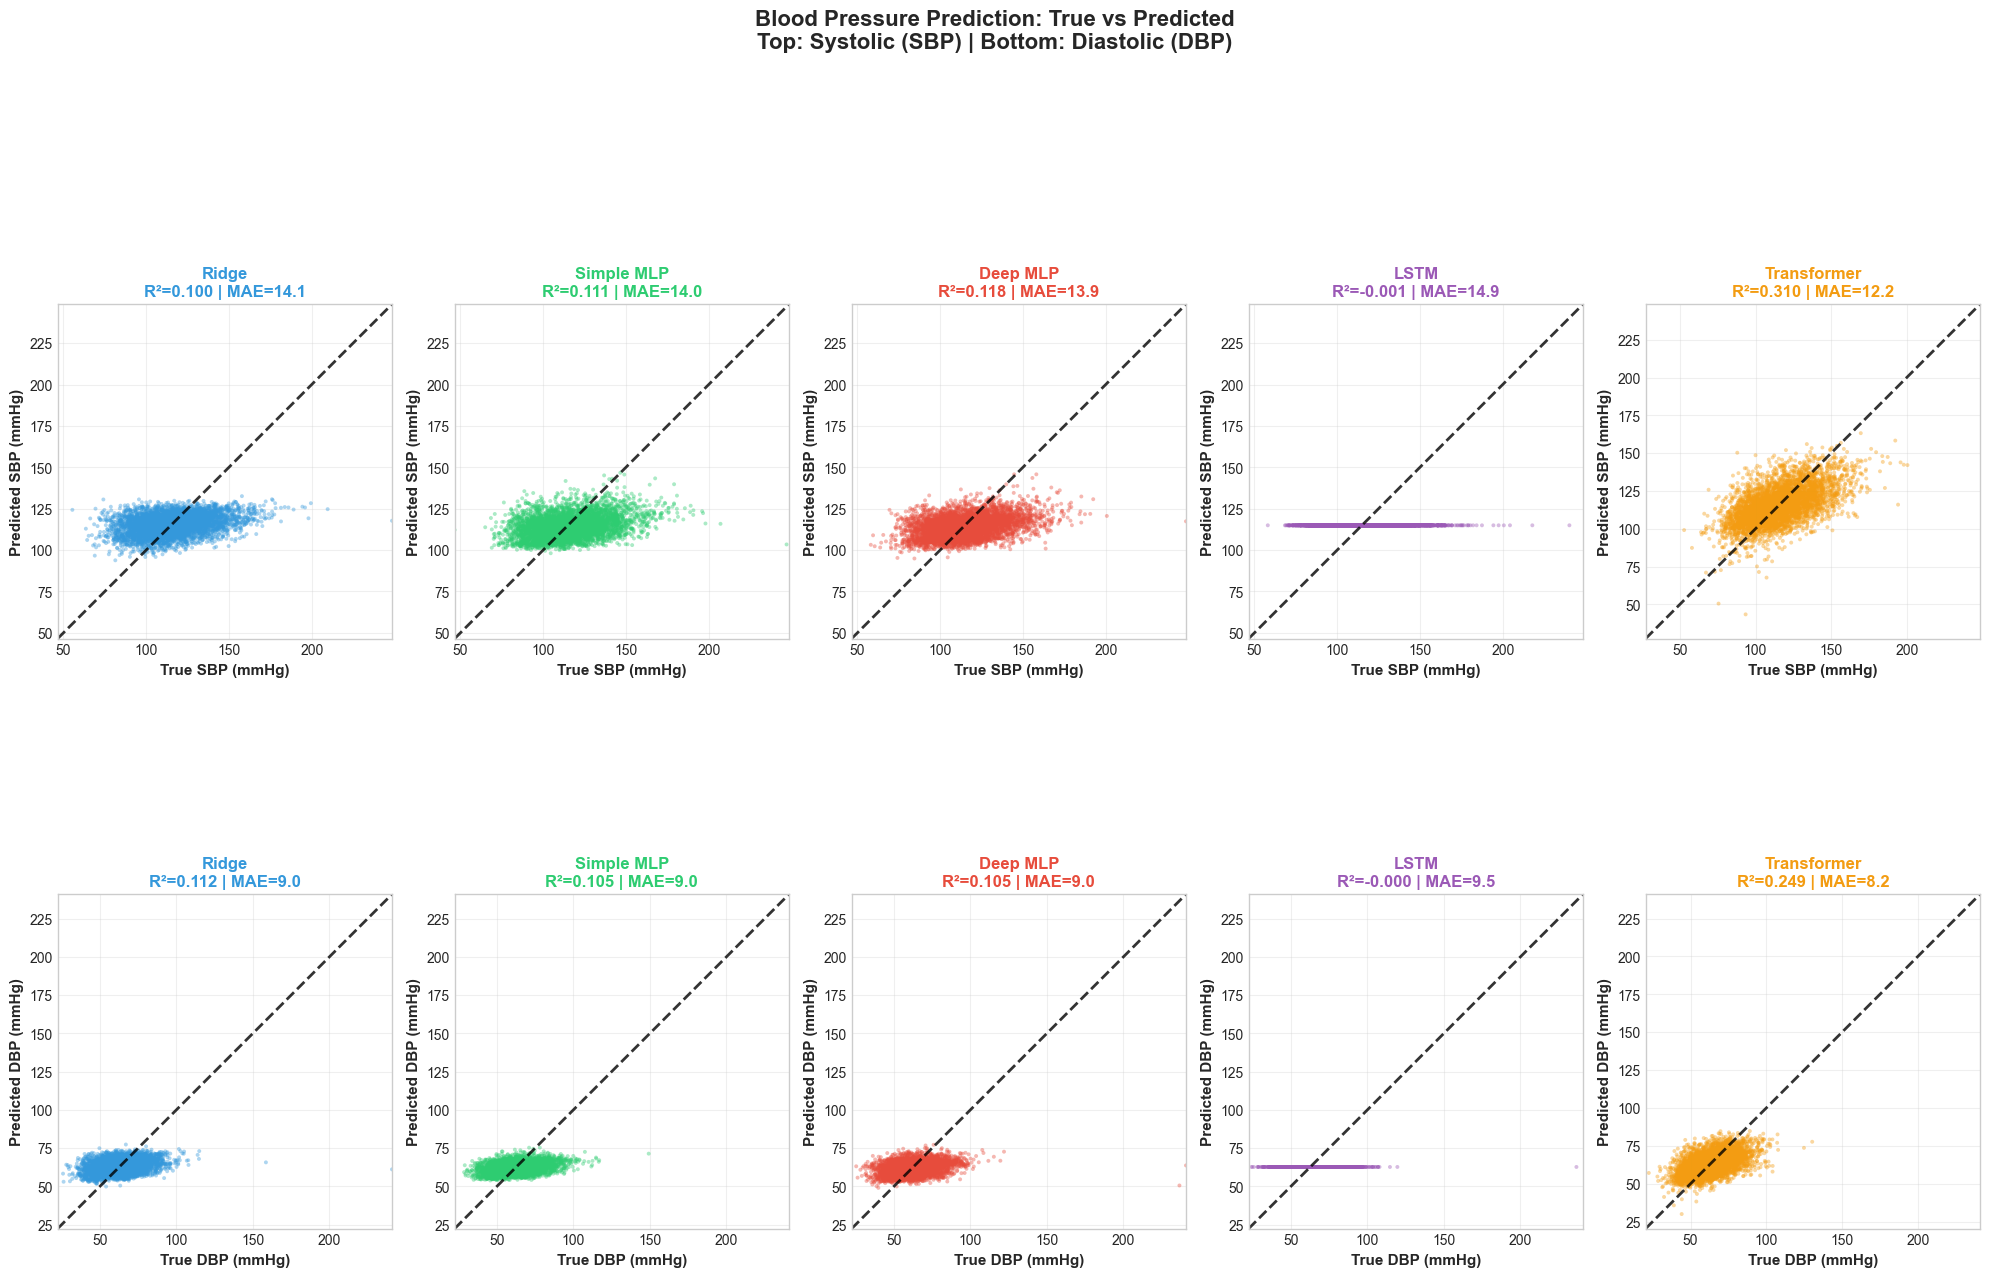

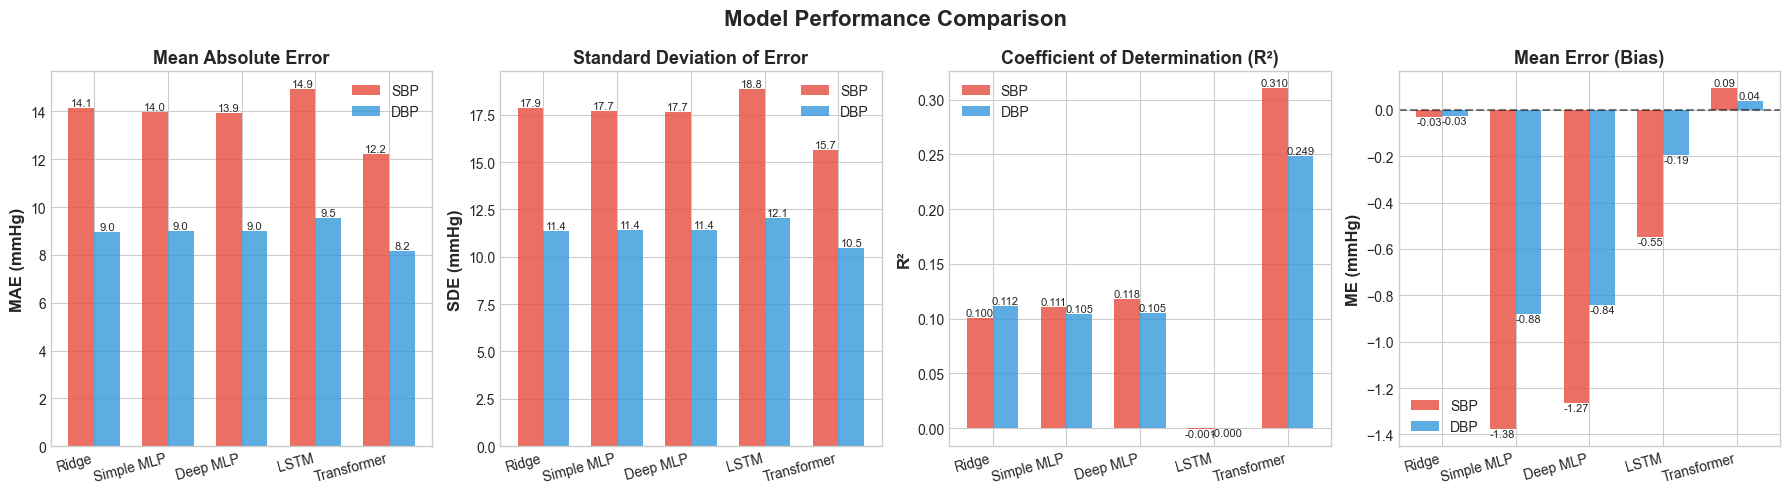


ADVANCED MODELS ANALYSIS COMPLETE


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import math

# Setup device - MPS for Mac, then CUDA, then CPU
if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using device: {device}")

# PREPARE SEQUENCE DATA (Raw signals for CNN/Transformer)
print("Preparing sequence data...")

# Stack ECG and PPG as 2-channel input: shape (n_samples, 2, seq_len)
X_train_seq = np.stack([ECG_Train, PPG_Train], axis=1).astype(np.float32)
X_test_seq = np.stack([ECG_CalBased_Test, PPG_CalBased_Test], axis=1).astype(np.float32)

# Normalize signals per sample
X_train_seq = (X_train_seq - X_train_seq.mean(axis=2, keepdims=True)) / (X_train_seq.std(axis=2, keepdims=True) + 1e-8)
X_test_seq = (X_test_seq - X_test_seq.mean(axis=2, keepdims=True)) / (X_test_seq.std(axis=2, keepdims=True) + 1e-8)

print(f"Sequence data shape: {X_train_seq.shape}")  # (n_samples, 2, 1250)

# Subsample for faster training (use every 10th sample)
subsample_factor = 10
X_train_sub = X_train_seq[::subsample_factor]
y_train_sbp_sub = y_train_sbp[::subsample_factor]
y_train_dbp_sub = y_train_dbp[::subsample_factor]
print(f"Subsampled training size: {len(X_train_sub)}")

# Convert to tensors
X_train_tensor_seq = torch.FloatTensor(X_train_sub)
y_train_tensor_seq = torch.FloatTensor(np.column_stack([y_train_sbp_sub, y_train_dbp_sub]))
X_test_tensor_seq = torch.FloatTensor(X_test_seq)

train_dataset_seq = TensorDataset(X_train_tensor_seq, y_train_tensor_seq)
train_loader_seq = DataLoader(train_dataset_seq, batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor_seq), batch_size=256)

criterion = nn.MSELoss()

# MODEL 3: 1D CNN
print("\n" + "=" * 60)
print("MODEL 3: CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("=" * 60)

class CNN1D(nn.Module):
    """
    1D CNN for time-series blood pressure prediction.
    Uses multiple conv blocks with increasing channels and residual connections.
    """
    def __init__(self, input_channels=2, seq_len=1250):
        super(CNN1D, self).__init__()
        
        # First conv block - capture local patterns
        self.conv1 = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=7, padding=3),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(2)  # 1250 -> 625
        )
        
        # Second conv block - wider receptive field
        self.conv2 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2)  # 625 -> 312
        )
        
        # Third conv block - deeper features
        self.conv3 = nn.Sequential(
            nn.Conv1d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2)  # 312 -> 156
        )
        
        # Fourth conv block
        self.conv4 = nn.Sequential(
            nn.Conv1d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # Global average pooling -> (batch, 256, 1)
        )
        
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 2)  # Output: SBP and DBP
        )
    
    def forward(self, x):
        # x: (batch, channels, seq_len)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.squeeze(-1)  # (batch, 256)
        return self.fc(x)

# Train CNN
cnn_model = CNN1D().to(device)
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)

n_epochs = 25
for epoch in range(n_epochs):
    cnn_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader_seq:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = cnn_model(X_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader_seq)
    scheduler.step(avg_loss)
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}")

# Evaluate CNN
cnn_model.eval()
pred_sbp_cnn = []
pred_dbp_cnn = []
with torch.no_grad():
    for (X_batch,) in test_loader:
        pred = cnn_model(X_batch.to(device)).cpu().numpy()
        pred_sbp_cnn.extend(pred[:, 0])
        pred_dbp_cnn.extend(pred[:, 1])
pred_sbp_cnn = np.array(pred_sbp_cnn)
pred_dbp_cnn = np.array(pred_dbp_cnn)

metrics_cnn_sbp = compute_metrics(y_test_sbp, pred_sbp_cnn)
metrics_cnn_dbp = compute_metrics(y_test_dbp, pred_dbp_cnn)
print_metrics(metrics_cnn_sbp, "CNN", "SBP")
print_metrics(metrics_cnn_dbp, "CNN", "DBP")


# MODEL 4: IMPROVED TRANSFORMER
print("\n" + "=" * 60)
print("MODEL 4: IMPROVED TRANSFORMER")
print("=" * 60)

class PositionalEncoding(nn.Module):
    """Sinusoidal positional encoding for transformer"""
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))
    
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class ImprovedTransformer(nn.Module):
    """
    Improved Transformer for time-series regression.
    Features:
    - Convolutional embedding for local feature extraction
    - Sinusoidal positional encoding
    - Multi-head self-attention with proper masking
    - Layer normalization and residual connections
    """
    def __init__(self, input_channels=2, d_model=64, nhead=4, num_layers=3, 
                 dim_feedforward=256, dropout=0.1, seq_len=1250):
        super().__init__()
        
        # Convolutional embedding - captures local patterns before attention
        self.conv_embed = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=7, stride=1, padding=3),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(5),  # 1250 -> 250
            nn.Conv1d(32, d_model, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(d_model),
            nn.ReLU(),
            nn.MaxPool1d(5)   # 250 -> 50
        )
        
        # Positional encoding
        self.pos_encoder = PositionalEncoding(d_model, max_len=100)
        
        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead,
            dim_feedforward=dim_feedforward, 
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Layer norm before output
        self.norm = nn.LayerNorm(d_model)
        
        # Output head with both global average and CLS-like token
        self.fc = nn.Sequential(
            nn.Linear(d_model * 2, 64),  # Concat avg pool + max pool
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(64, 2)
        )
    
    def forward(self, x):
        # x: (batch, channels, seq_len)
        
        # Convolutional embedding
        x = self.conv_embed(x)  # (batch, d_model, reduced_seq)
        x = x.permute(0, 2, 1)  # (batch, reduced_seq, d_model)
        
        # Add positional encoding
        x = self.pos_encoder(x)
        
        # Transformer encoding
        x = self.transformer(x)
        x = self.norm(x)
        
        # Pooling: combine global average and max pooling
        avg_pool = x.mean(dim=1)  # (batch, d_model)
        max_pool = x.max(dim=1)[0]  # (batch, d_model)
        x = torch.cat([avg_pool, max_pool], dim=1)  # (batch, d_model * 2)
        
        return self.fc(x)

# Train Transformer
transformer_model = ImprovedTransformer().to(device)
optimizer = torch.optim.AdamW(transformer_model.parameters(), lr=0.0005, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=25)

n_epochs = 25
for epoch in range(n_epochs):
    transformer_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader_seq:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = transformer_model(X_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(transformer_model.parameters(), 1.0)
        optimizer.step()
        epoch_loss += loss.item()
    scheduler.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss/len(train_loader_seq):.4f}")

# Evaluate Transformer
transformer_model.eval()
pred_sbp_trans = []
pred_dbp_trans = []
with torch.no_grad():
    for (X_batch,) in test_loader:
        pred = transformer_model(X_batch.to(device)).cpu().numpy()
        pred_sbp_trans.extend(pred[:, 0])
        pred_dbp_trans.extend(pred[:, 1])
pred_sbp_trans = np.array(pred_sbp_trans)
pred_dbp_trans = np.array(pred_dbp_trans)

metrics_trans_sbp = compute_metrics(y_test_sbp, pred_sbp_trans)
metrics_trans_dbp = compute_metrics(y_test_dbp, pred_dbp_trans)
print_metrics(metrics_trans_sbp, "Transformer", "SBP")
print_metrics(metrics_trans_dbp, "Transformer", "DBP")


# COMPREHENSIVE COMPARISON TABLE
print("\n" + "=" * 60)
print("ALL MODELS COMPARISON")
print("=" * 60)

all_results = {
    'Model': ['Ridge', 'Simple MLP', 'CNN', 'Transformer'],
    'SBP_ME': [metrics_ridge_sbp['ME'], metrics_nn_sbp['ME'], metrics_cnn_sbp['ME'], metrics_trans_sbp['ME']],
    'SBP_SDE': [metrics_ridge_sbp['SDE'], metrics_nn_sbp['SDE'], metrics_cnn_sbp['SDE'], metrics_trans_sbp['SDE']],
    'SBP_MAE': [metrics_ridge_sbp['MAE'], metrics_nn_sbp['MAE'], metrics_cnn_sbp['MAE'], metrics_trans_sbp['MAE']],
    'SBP_R2': [metrics_ridge_sbp['R2'], metrics_nn_sbp['R2'], metrics_cnn_sbp['R2'], metrics_trans_sbp['R2']],
    'DBP_ME': [metrics_ridge_dbp['ME'], metrics_nn_dbp['ME'], metrics_cnn_dbp['ME'], metrics_trans_dbp['ME']],
    'DBP_SDE': [metrics_ridge_dbp['SDE'], metrics_nn_dbp['SDE'], metrics_cnn_dbp['SDE'], metrics_trans_dbp['SDE']],
    'DBP_MAE': [metrics_ridge_dbp['MAE'], metrics_nn_dbp['MAE'], metrics_cnn_dbp['MAE'], metrics_trans_dbp['MAE']],
    'DBP_R2': [metrics_ridge_dbp['R2'], metrics_nn_dbp['R2'], metrics_cnn_dbp['R2'], metrics_trans_dbp['R2']]
}
all_results_df = pd.DataFrame(all_results)
print(all_results_df.round(3).to_string(index=False))

# VISUALIZATION: Side-by-side comparison
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(16, 12))

# Model names and predictions
models = ['Ridge', 'Simple MLP', 'CNN', 'Transformer']
pred_sbp_all = [pred_sbp_ridge, pred_sbp_nn, pred_sbp_cnn, pred_sbp_trans]
pred_dbp_all = [pred_dbp_ridge, pred_dbp_nn, pred_dbp_cnn, pred_dbp_trans]
metrics_sbp_all = [metrics_ridge_sbp, metrics_nn_sbp, metrics_cnn_sbp, metrics_trans_sbp]
metrics_dbp_all = [metrics_ridge_dbp, metrics_nn_dbp, metrics_cnn_dbp, metrics_trans_dbp]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

# SBP plots (top row)
for i, (model, pred, metrics, color) in enumerate(zip(models, pred_sbp_all, metrics_sbp_all, colors)):
    ax = fig.add_subplot(2, 4, i + 1)
    
    # Subsample for faster plotting
    idx = np.random.choice(len(y_test_sbp), min(5000, len(y_test_sbp)), replace=False)
    ax.scatter(y_test_sbp[idx], pred[idx], alpha=0.4, s=8, c=color, edgecolors='none')
    
    # Perfect prediction line
    lims = [min(y_test_sbp.min(), pred.min()), max(y_test_sbp.max(), pred.max())]
    ax.plot(lims, lims, 'k--', lw=2, alpha=0.8, label='Perfect')
    
    ax.set_xlabel('True SBP (mmHg)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Predicted SBP (mmHg)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model}\nR²={metrics["R2"]:.3f} | MAE={metrics["MAE"]:.1f}', 
                 fontsize=12, fontweight='bold', color=color)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

# DBP plots (bottom row)
for i, (model, pred, metrics, color) in enumerate(zip(models, pred_dbp_all, metrics_dbp_all, colors)):
    ax = fig.add_subplot(2, 4, i + 5)
    
    idx = np.random.choice(len(y_test_dbp), min(5000, len(y_test_dbp)), replace=False)
    ax.scatter(y_test_dbp[idx], pred[idx], alpha=0.4, s=8, c=color, edgecolors='none')
    
    lims = [min(y_test_dbp.min(), pred.min()), max(y_test_dbp.max(), pred.max())]
    ax.plot(lims, lims, 'k--', lw=2, alpha=0.8)
    
    ax.set_xlabel('True DBP (mmHg)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Predicted DBP (mmHg)', fontsize=11, fontweight='bold')
    ax.set_title(f'{model}\nR²={metrics["R2"]:.3f} | MAE={metrics["MAE"]:.1f}', 
                 fontsize=12, fontweight='bold', color=color)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

plt.suptitle('Blood Pressure Prediction: True vs Predicted\nTop: Systolic (SBP) | Bottom: Diastolic (DBP)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('bp_all_models_comparison.png', dpi=150, bbox_inches='tight')
plt.show()


# BAR CHART COMPARISON
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
x = np.arange(len(models))
width = 0.35

# MAE comparison
ax = axes[0]
sbp_vals = [m['MAE'] for m in metrics_sbp_all]
dbp_vals = [m['MAE'] for m in metrics_dbp_all]
bars1 = ax.bar(x - width/2, sbp_vals, width, label='SBP', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, dbp_vals, width, label='DBP', color='#3498db', alpha=0.8)
ax.set_ylabel('MAE (mmHg)', fontsize=12, fontweight='bold')
ax.set_title('Mean Absolute Error', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right', fontsize=10)
ax.legend()
ax.bar_label(bars1, fmt='%.1f', fontsize=8)
ax.bar_label(bars2, fmt='%.1f', fontsize=8)

# SDE comparison
ax = axes[1]
sbp_vals = [m['SDE'] for m in metrics_sbp_all]
dbp_vals = [m['SDE'] for m in metrics_dbp_all]
bars1 = ax.bar(x - width/2, sbp_vals, width, label='SBP', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, dbp_vals, width, label='DBP', color='#3498db', alpha=0.8)
ax.set_ylabel('SDE (mmHg)', fontsize=12, fontweight='bold')
ax.set_title('Standard Deviation of Error', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right', fontsize=10)
ax.legend()
ax.bar_label(bars1, fmt='%.1f', fontsize=8)
ax.bar_label(bars2, fmt='%.1f', fontsize=8)

# R² comparison
ax = axes[2]
sbp_vals = [m['R2'] for m in metrics_sbp_all]
dbp_vals = [m['R2'] for m in metrics_dbp_all]
bars1 = ax.bar(x - width/2, sbp_vals, width, label='SBP', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, dbp_vals, width, label='DBP', color='#3498db', alpha=0.8)
ax.set_ylabel('R²', fontsize=12, fontweight='bold')
ax.set_title('Coefficient of Determination (R²)', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right', fontsize=10)
ax.legend()
ax.bar_label(bars1, fmt='%.3f', fontsize=8)
ax.bar_label(bars2, fmt='%.3f', fontsize=8)

# ME comparison (bias)
ax = axes[3]
sbp_vals = [m['ME'] for m in metrics_sbp_all]
dbp_vals = [m['ME'] for m in metrics_dbp_all]
bars1 = ax.bar(x - width/2, sbp_vals, width, label='SBP', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, dbp_vals, width, label='DBP', color='#3498db', alpha=0.8)
ax.axhline(0, color='k', linestyle='--', alpha=0.5)
ax.set_ylabel('ME (mmHg)', fontsize=12, fontweight='bold')
ax.set_title('Mean Error (Bias)', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right', fontsize=10)
ax.legend()
ax.bar_label(bars1, fmt='%.2f', fontsize=8)
ax.bar_label(bars2, fmt='%.2f', fontsize=8)

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('bp_metrics_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("CNN & TRANSFORMER ANALYSIS COMPLETE")
print("=" * 60)


#3. Generative Modeling

In [10]:
# your code here

In [11]:
#Delete the dataset
# dataset_path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
# print(f"Dataset path: {dataset_path}")
# rm -rf /Users/bodepacker/.cache/kagglehub/datasets/weinanwangrutgers/pulsedb-balanced-training-and-testing/versions/4